In [1]:
import IPython.display as ipd
fname = 'C:/Users/HP/SpeechData/Actor_17/03-01-04-02-01-02-17.wav'
ipd.Audio(fname)

In [2]:
import wave
wav = wave.open(fname)
print("Sampling rate = ", wav.getframerate())
print("Total no. of samples  = ", wav.getnframes())
print("Duration of the audio= ", wav.getnframes()/wav.getframerate())

Sampling rate =  16000
Total no. of samples  =  59259
Duration of the audio=  3.7036875


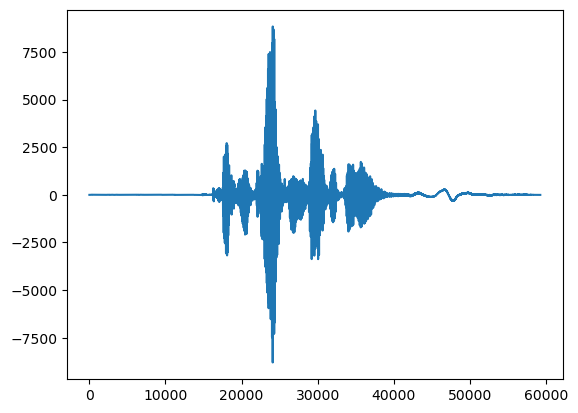

In [3]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
rate, data = wavfile.read(fname);
plt.plot(data, '-', );

In [4]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import argparse
import os
from glob import glob
import numpy as np
import pandas as pd
from librosa.core import resample
from IPython.display import Audio
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),min_periods=1,center=True).max()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask, y_mean
def downsample_mono(path, sr):
    rate, wav = wavfile.read(path)
    wav = wav.astype(np.float32, order='F')
    try:
        tmp = wav.shape[1]
        wav = to_mono(wav.T)
    except:
        pass
    wav = resample(y=wav, orig_sr=rate, target_sr=sr)
    wav = wav.astype(np.int16)
    return sr, wav


def check_dir(path):
    if os.path.exists(path) is False:
        os.mkdir(path)


def test_threshold(args):
    src_root = args.src_root
    wav_paths = glob('{}/**'.format(src_root), recursive=True)
    wav_path = [x for x in wav_paths if args.fn in x]
    if len(wav_path) != 1:
        print('Audio file not found: {}'.format(args.fn))
        return
    rate, wav = downsample_mono(wav_path[0], args.sr)
    mask, env = envelope(wav, rate, threshold=args.threshold)
    fig = plt.figure(figsize=(30, 30))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    plt.style.use('ggplot')
    plt.title('Signal Envelope, Threshold = {}'.format(str(args.threshold)))
    
    ax1.plot(wav, color='g', label='original')
    ax1.set_title('Original Audio',fontsize=30)
    ax2.plot(wav[mask], color='c', label='keep')
    ax2.plot(wav[np.logical_not(mask)], color='r', label='remove')
    ax2.legend(loc='best',fontsize=30)
    ax2.set_title('Processed Audio',fontsize=30)
    plt.show()
    filename = args.fn.split('.')[0] + '_c.wav'
    path = os.path.join(args.src_root, filename)
    wavfile.write(path, rate, wav[mask])
    print(f"Saved Pure Speech Audio to {path}")

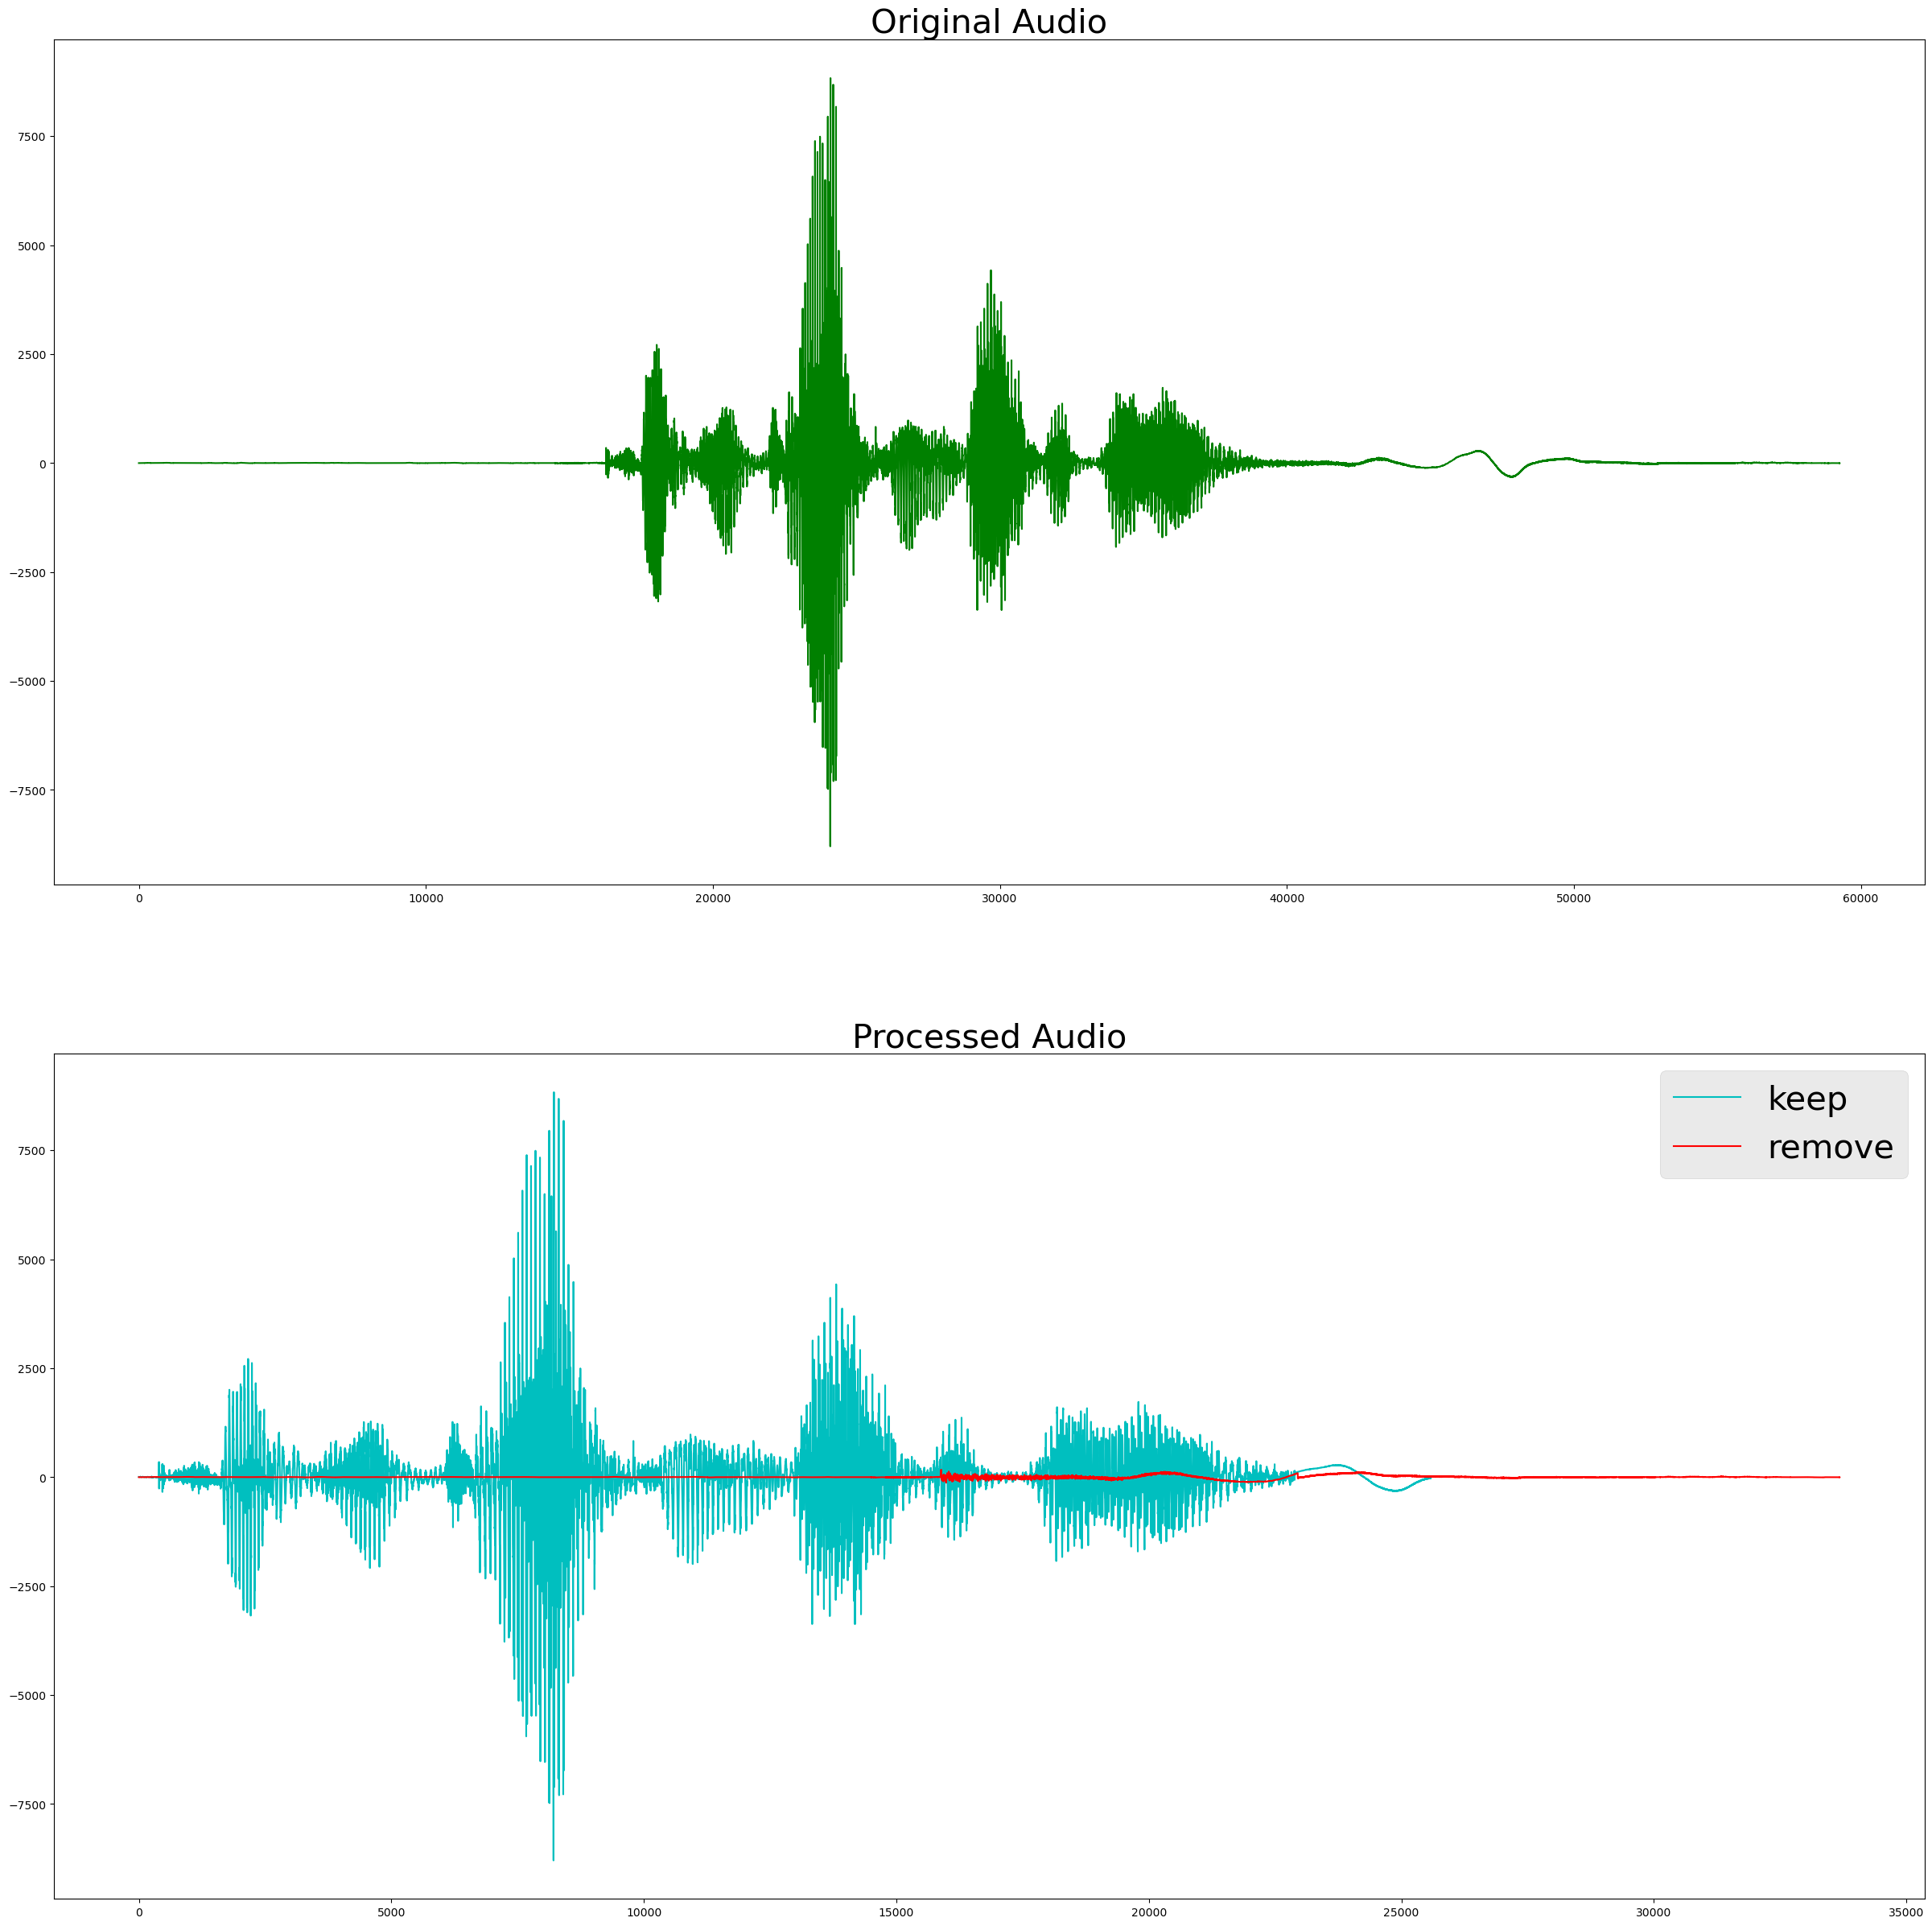

Saved Pure Speech Audio to C:/Users/HP/SpeechData/Actor_17/03-01-04-02-01-02-17_c.wav


In [5]:
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Cleaning audio data')
    parser.add_argument('--src_root', type=str, default='C:/Users/HP/SpeechData/Actor_17/',
                        help='directory of audio files in total duration')
    parser.add_argument('--delta_time', '-dt', type=float, default=1.0,
                        help='time in seconds to sample audio')
    parser.add_argument('--sr', type=int, default=16000,
                        help='rate to downsample audio')
    parser.add_argument('--fn', type=str, default='03-01-04-02-01-02-17.wav',
                        help='file to plot over time to check magnitude')
    parser.add_argument('--threshold', type=int, default=200,
                        help='threshold magnitude for np.int16 dtype')
    args, _ = parser.parse_known_args()

    test_threshold(args)

In [6]:
fnames='C:/Users/HP/SpeechData/Actor_17/03-01-04-02-01-02-17_c.wav'
wavs = wave.open(fnames)
print("After Removing Noise,Sampling rate = ", wavs.getframerate())
print("Total no. of samples  = ", wavs.getnframes())
print("Duration of the audio= ", wavs.getnframes()/wavs.getframerate())

After Removing Noise,Sampling rate =  16000
Total no. of samples  =  25581
Duration of the audio=  1.5988125


In [7]:
ipd.Audio(fnames)

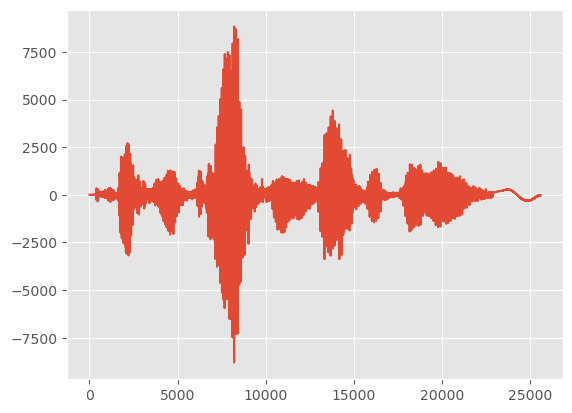

In [8]:
rate, data = wavfile.read(fnames);
plt.plot(data, '-', );

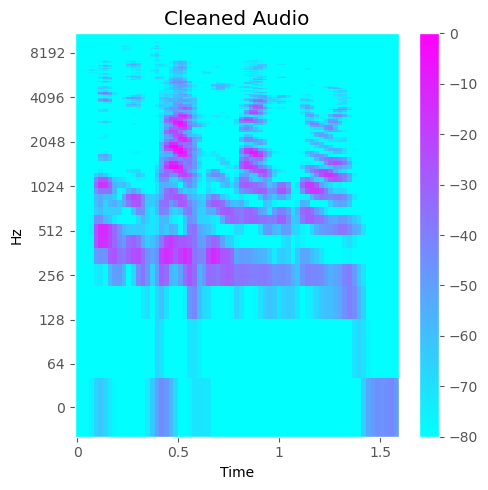

In [9]:
import librosa
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
i = 0
j = 0
data,sampling_rate = librosa.load(fnames)    
mel_spec = librosa.feature.melspectrogram(y=data, sr=16000)    
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
img = librosa.display.specshow(mel_spec_db, sr = sampling_rate, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes)
fig.colorbar(img, ax=axes)  
axes.set_title("Cleaned Audio")
if(j == 1):
    i = i + 1
    j = 0
else:
    j = j + 1
plt.tight_layout()
plt.show()

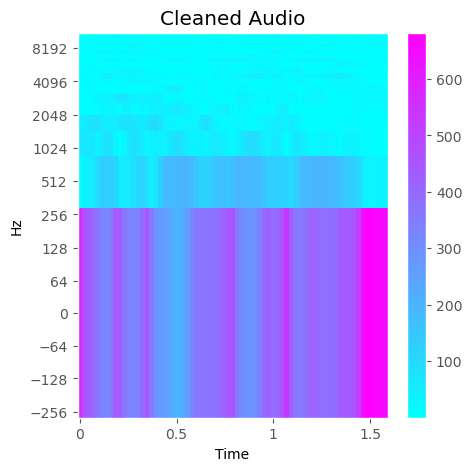

In [11]:
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
i = 0
j = 0
data,sampling_rate = librosa.load(fnames)     
mfcc_data = np.abs(librosa.feature.mfcc(y=data, sr =16000))   
img = librosa.display.specshow(mfcc_data, sr = sampling_rate, x_axis = 'time', y_axis = 'log',cmap = 'cool',ax=axes)
fig.colorbar(img, ax=axes)
axes.set_title("Cleaned Audio")
if(j == 1):
    i = i + 1
    j = 0
else:
    j = j + 1

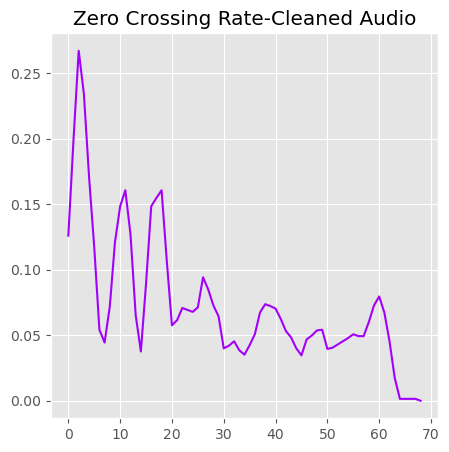

In [12]:
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
i = 0
j = 0
data,sampling_rate = librosa.load(fnames)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data,hop_length = 512)[0]
axes.plot(zero_crossing_rate,color = "#A300F9")
axes.set_title("Zero Crossing Rate-Cleaned Audio")
if(j == 1):
    i = i + 1
    j = 0
else:
    j = j + 1

Spectral Flux-Cleaned Audio


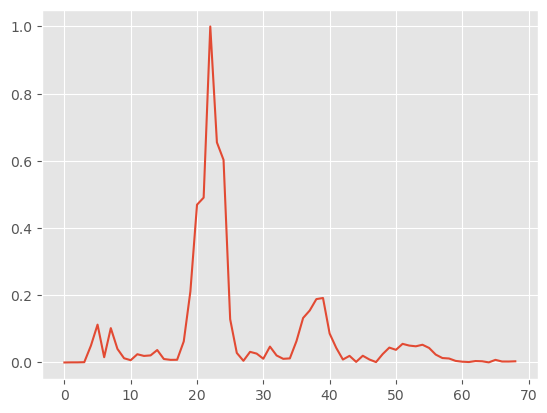

In [13]:
data, sr = librosa.load(fnames)
stft = librosa.stft(y=data, hop_length=512)
spec = np.abs(stft)
spectral_flux = np.zeros(spec.shape[1])
for i in range(1, spec.shape[1]):
    spectral_flux[i] = np.sum((spec[:, i] - spec[:, i-1])**2)
spectral_flux = librosa.util.normalize(spectral_flux)
plt.plot(spectral_flux)
print("Spectral Flux-Cleaned Audio")
plt.show()

Chroma Vector-Cleaned Audio


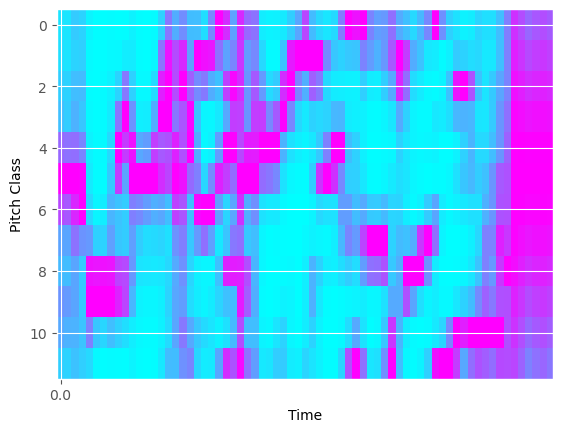

In [14]:
spect = np.abs(stft)**2
chroma = librosa.feature.chroma_stft(S=spect, sr=sr, hop_length=512)
plt.imshow(chroma, cmap='cool', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Pitch Class')
plt.xticks(np.arange(0, chroma.shape[1], 100), np.arange(0, chroma.shape[1]/sr, 0.1))
print("Chroma Vector-Cleaned Audio")
plt.show()